In [1]:
from IPython.core.display import HTML
css_file = './numericalmoocstyle.css'
HTML(open(css_file, "r").read())

In [2]:
import numpy
from matplotlib import pyplot
%matplotlib inline

## Tungsten

In [3]:
npoints = 28

In [4]:
def get_temperature(data_points):
    ''' Defines temperature data points
    '''
    Temperature = numpy.zeros((data_points),dtype=float)
    Temperature[0] = 300.
    #
    for i in range(1,data_points):
        Temperature[i] = Temperature[i-1]+100.
    #
    return Temperature

In [5]:
Tx = get_temperature(npoints)

In [6]:
Tx

array([  300.,   400.,   500.,   600.,   700.,   800.,   900.,  1000.,
        1100.,  1200.,  1300.,  1400.,  1500.,  1600.,  1700.,  1800.,
        1900.,  2000.,  2100.,  2200.,  2300.,  2400.,  2500.,  2600.,
        2700.,  2800.,  2900.,  3000.])

In [7]:
def get_resistivity(data_points):
    ''' Defines resistivity ohm*meter of Tungsten
    
    ref: http://hypertextbook.com/facts/2004/DeannaStewart.shtml
    '''
    Resistivity = numpy.zeros((data_points),dtype=float)
    cf = (1e-6)*(1e-2)
    #
    Resistivity[0] = 5.65 #microohm*cm
    Resistivity[1] = 8.06
    Resistivity[2] = 10.56
    Resistivity[3] = 13.23
    Resistivity[4] = 16.09
    Resistivity[5] = 19.0
    Resistivity[6] = 21.94
    Resistivity[7] = 24.93
    Resistivity[8] = 27.94
    Resistivity[9] = 30.98
    Resistivity[10] = 34.08
    Resistivity[11] = 37.19
    Resistivity[12] = 40.36
    Resistivity[13] = 43.55
    Resistivity[14] = 46.78
    Resistivity[15] = 50.05
    Resistivity[16] = 53.35
    Resistivity[17] = 56.67
    Resistivity[18] = 60.06
    Resistivity[19] = 63.48
    Resistivity[20] = 66.91
    Resistivity[21] = 70.39
    Resistivity[22] = 73.91
    Resistivity[23] = 77.49
    Resistivity[24] = 81.04
    Resistivity[25] = 84.70
    Resistivity[26] = 88.33
    Resistivity[27] = 105.
    #
    Resistivity[:] = Resistivity[:]*cf
    #
    return Resistivity
    

In [8]:
Rx = get_resistivity(npoints)

In [9]:
def plot(v1, v2, xlabl, ylabl, title):
    ''' a function for plots
    
    Parameters
    ----------
    v1: x-axis vector
    v2: y-axis vector
    xlabl: label for x-axis values
    ylabl: label for y-axis values
    title: plot title
    
    Return:
    -------
    Plot!
    '''
    #
    pyplot.figure(figsize=(8,8))
    pyplot.grid(True)
    #
    pyplot.xlabel(xlabl, fontsize=18)
    pyplot.ylabel(ylabl, fontsize=18)
    #
    pyplot.tick_params(axis='x', pad=10)
    pyplot.tick_params(axis='y', pad=10)
    #
    pyplot.xticks(numpy.arange(0, 3000, 200))
    #
    pyplot.title(title)
    pyplot.plot(v1,v2, color='k', ls='--', lw=2, marker='o');

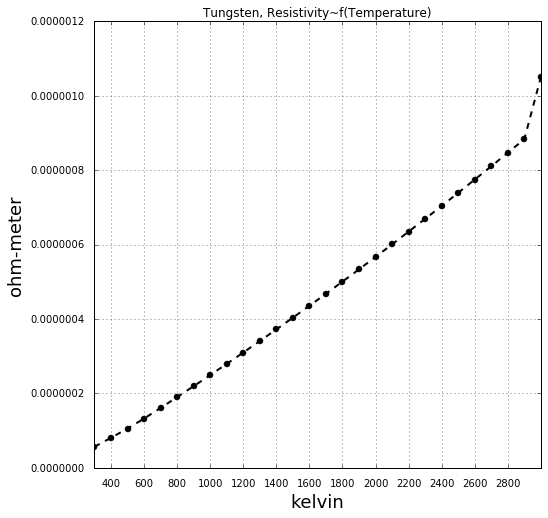

In [10]:
plot(Tx[:],Rx[:],'kelvin','ohm-meter','Tungsten, Resistivity~f(Temperature)')

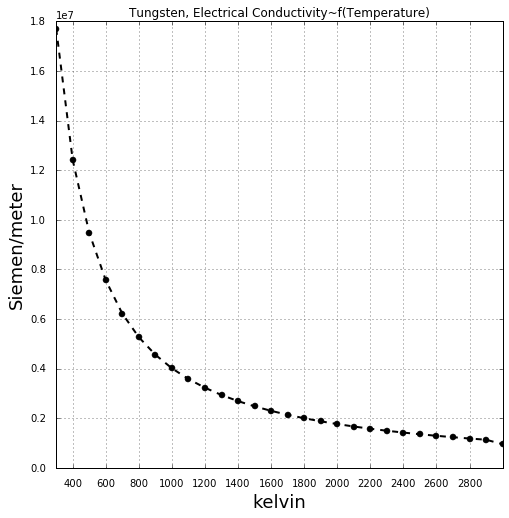

In [11]:
plot(Tx[:],1/Rx[:],'kelvin','Siemen/meter','Tungsten, Electrical Conductivity~f(Temperature)')

In [12]:
1/Rx[1]

12406947.890818857

In [13]:
1/Rx[-1]

952380.95238095231

In [14]:
numpy.average(1/Rx[1:])

3250347.1222444405

### Curve fit based on data

In [15]:
A = numpy.vstack([Tx**2,Tx,numpy.ones(len(Tx))]).T

In [16]:
a,b,c = numpy.linalg.lstsq(A,Rx)[0]

In [17]:
#second order polynomial
Rx_fit = numpy.zeros_like(Tx)
Rx_fit[:] = a*(Tx[:]**2) + b*(Tx[:]) + c

In [18]:
#third order polynomial
A2 = numpy.vstack([Tx**3,Tx**2,Tx,numpy.ones(len(Tx))]).T
a2,b2,c2,d2 = numpy.linalg.lstsq(A2,Rx)[0]

In [19]:
a2

2.1944927729132266e-17

In [20]:
b2

-7.312046623503785e-14

In [21]:
c2

3.6788309037808543e-10

In [22]:
d2

-6.1212828933518841e-08

In [23]:
Rx_fit2 = numpy.zeros_like(Tx)
Rx_fit2[:] = a2*(Tx[:]**3) + b2*(Tx[:]**2) + c2*(Tx[:]) + d2

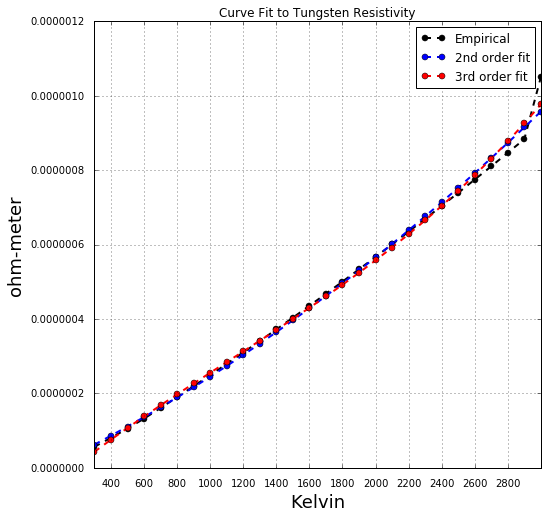

In [24]:
%matplotlib inline
#
pyplot.figure(figsize=(8,8))
pyplot.grid(True)
#
pyplot.xlabel('Kelvin', fontsize=18)
pyplot.ylabel('ohm-meter', fontsize=18)
#
pyplot.tick_params(axis='x', pad=10)
pyplot.tick_params(axis='y', pad=10)
#
pyplot.xticks(numpy.arange(0, 3000, 200))
#
pyplot.title('Curve Fit to Tungsten Resistivity')
#
pyplot.plot(Tx,Rx,color='k', ls='--', lw=2, marker='o')
pyplot.plot(Tx,Rx_fit,color='b',ls='--', lw=2, marker='o');
pyplot.plot(Tx,Rx_fit2,color='r',ls='--', lw=2, marker='o')
pyplot.legend(['Empirical','2nd order fit','3rd order fit']);

## Nitrogen

In [25]:
def get_electrical_conductivity_nitrogen(data_points):
    ''' Defines the electrical conductivity of ionized nitrogen {S/m}
    
    This is for P = 2,4,6,8 atm
    
    Ref: Handbook of Physical properties of Liquids and Gases. Pure Substances 
    and mixtures. N.B. Vargaftik; Y.K. Vinogradov; V. S. Yargin. pg. 789
    '''
    # 2 atm
    econdn = numpy.zeros((data_points),dtype=float)
    econdn[0] = 57.5 # S/cm
    econdn[1] = 81.1
    econdn[2] = 109.
    econdn[3] = 131.8
    econdn[4] = 147.6
    econdn[5] = 160.
    econdn[6] = 166.
    econdn[7] = 173.
    econdn[8] = 179.
    econdn[9] = 182.
    # 4 atm
    econdn2 = numpy.zeros((data_points),dtype=float)
    econdn2[0] = 61.1 # S/cm
    econdn2[1] = 86.
    econdn2[2] = 117.2
    econdn2[3] = 141.
    econdn2[4] = 162.0
    econdn2[5] = 175.
    econdn2[6] = 181.5
    econdn2[7] = 188.
    econdn2[8] = 192.5
    econdn2[9] = 197.
    # 6 atm
    econdn3 = numpy.zeros((data_points),dtype=float)
    econdn3[0] = 63. # S/cm
    econdn3[1] = 88.5
    econdn3[2] = 124.3
    econdn3[3] = 148.
    econdn3[4] = 174.0
    econdn3[5] = 185.
    econdn3[6] = 191.
    econdn3[7] = 197.
    econdn3[8] = 203.5
    econdn3[9] = 207.
    # 8 atm
    econdn4 = numpy.zeros((data_points),dtype=float)
    econdn4[0] = 64.8 # S/cm
    econdn4[1] = 91.2
    econdn4[2] = 127.
    econdn4[3] = 150.
    econdn4[4] = 177.2
    econdn4[5] = 192.5
    econdn4[6] = 197.0
    econdn4[7] = 204.
    econdn4[8] = 210.
    econdn4[9] = 214.
    #
    econdn[:] = 1e-2*econdn[:] #S/m
    econdn2[:] = 1e-2*econdn2[:] #S/m
    econdn3[:] = 1e-2*econdn3[:] #S/m
    econdn4[:] = 1e-2*econdn4[:] #S/m
    #
    return econdn,econdn2,econdn3, econdn4
    

In [26]:
def get_temperature2(data_points):
    '''temperature array for nitrogen electrical conducivity
    '''
    Temperature = numpy.zeros((data_points),dtype=float)
    #
    Temperature[0] = 1200.
    for i in range(1,data_points):
        Temperature[i] = Temperature[i-1]+200.
    return Temperature

In [27]:
npoints2 = 10
ecn2,ecn4,ecn6,ecn8 = get_electrical_conductivity_nitrogen(npoints2)
Tn = get_temperature2(npoints2)

In [28]:
Tn

array([ 1200.,  1400.,  1600.,  1800.,  2000.,  2200.,  2400.,  2600.,
        2800.,  3000.])

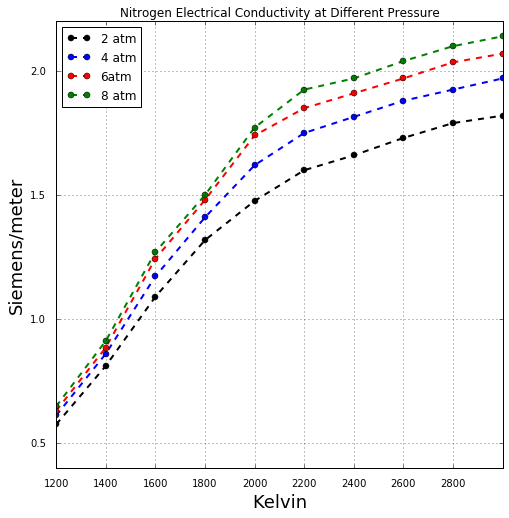

In [29]:
%matplotlib inline
#
pyplot.figure(figsize=(8,8))
pyplot.grid(True)
#
pyplot.xlabel('Kelvin', fontsize=18)
pyplot.ylabel('Siemens/meter', fontsize=18)
#
pyplot.tick_params(axis='x', pad=10)
pyplot.tick_params(axis='y', pad=10)
#
pyplot.xticks(numpy.arange(1200, 3000, 200))
#
pyplot.title('Nitrogen Electrical Conductivity at Different Pressure')
#
pyplot.plot(Tn,ecn2,color='k', ls='--', lw=2, marker='o')
pyplot.plot(Tn,ecn4,color='b',ls='--', lw=2, marker='o')
pyplot.plot(Tn,ecn6,color='r',ls='--', lw=2, marker='o')
pyplot.plot(Tn,ecn8,color='g',ls='--', lw=2, marker='o')
pyplot.legend(['2 atm','4 atm','6atm','8 atm'], loc='upper left');

### curve fit based on data

In [30]:
#second order
A3 = numpy.vstack([Tn**2,Tn,numpy.ones(len(Tn))]).T
a3,b3,c3 = numpy.linalg.lstsq(A3,ecn2)[0]
#third order
A4 = numpy.vstack([Tn**3,Tn**2,Tn,numpy.ones(len(Tn))]).T
a4,b4,c4,d4 = numpy.linalg.lstsq(A4,ecn2)[0]

In [31]:
ecn2_fit = numpy.zeros_like(Tn)
ecn2_fit2 = numpy.zeros_like(Tn)
#
ecn2_fit[:] = a3*(Tn[:]**2) + b3*(Tn[:]) + c3
ecn2_fit2[:] = a4*(Tn[:]**3) + b4*(Tn[:]**2) + c4*(Tn[:]) + d4

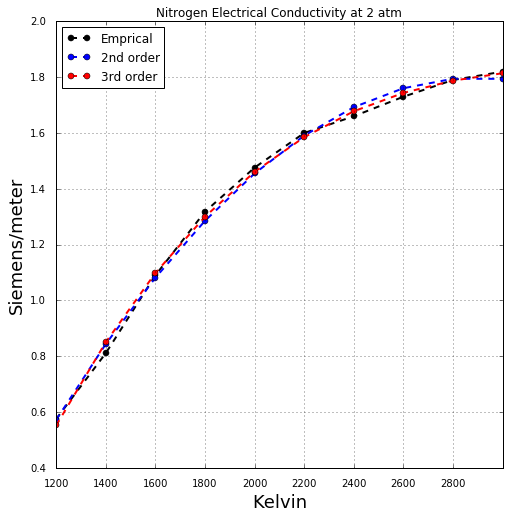

In [32]:
%matplotlib inline
#
pyplot.figure(figsize=(8,8))
pyplot.grid(True)
#
pyplot.xlabel('Kelvin', fontsize=18)
pyplot.ylabel('Siemens/meter', fontsize=18)
#
pyplot.tick_params(axis='x', pad=10)
pyplot.tick_params(axis='y', pad=10)
#
pyplot.xticks(numpy.arange(1200, 3000, 200))
#
pyplot.title('Nitrogen Electrical Conductivity at 2 atm')
#
pyplot.plot(Tn,ecn2,color='k', ls='--', lw=2, marker='o')
pyplot.plot(Tn,ecn2_fit,color='b',ls='--', lw=2, marker='o')
pyplot.plot(Tn,ecn2_fit2,color='r',ls='--', lw=2, marker='o')
pyplot.legend(['Emprical','2nd order','3rd order'], loc='upper left');

## Boron

In [33]:
Tb = numpy.zeros((6),dtype=float)
Rb = numpy.zeros((6),dtype=float)
#Restrict Data starting from around 300 Kelvin
Tb[0],Tb[1],Tb[2],Tb[3],Tb[4],Tb[5] = 292.,333.33, 416.68,500.,750.,1000.
Rb[0],Rb[1],Rb[2],Rb[3],Rb[4],Rb[5] = 1e6,1e5, 1e4,1e2+0.6*(1e3-1e2),10,0.35

### curve fit

In [34]:
#second order
A5 = numpy.vstack([Tb**2,Tb,numpy.ones(len(Tb))]).T
a5,b5,c5 = numpy.linalg.lstsq(A5,Rb)[0]
#third order
A6 = numpy.vstack([Tb**3,Tb**2,Tb,numpy.ones(len(Tb))]).T
a6,b6,c6,d6 = numpy.linalg.lstsq(A6,Rb)[0]
#fourth order  
A7 = numpy.vstack([Tb**4,Tb**3,Tb**2,Tb,numpy.ones(len(Tb))]).T
a7,b7,c7,d7,e7 = numpy.linalg.lstsq(A7,Rb)[0]
#sixth order
A9 = numpy.vstack([Tb**6,Tb**5,Tb**4,Tb**3,Tb**2,Tb,numpy.ones(len(Tb))]).T
a9,b9,c9,d9,e9,f9,g9 = numpy.linalg.lstsq(A9,Rb)[0]

In [35]:
rb_fit = numpy.zeros_like(Tb)
rb_fit2 = numpy.zeros_like(Tb)
rb_fit3 = numpy.zeros_like(Tb)
rb_fit5 = numpy.zeros_like(Tb)
#
rb_fit[:] = a5*(Tb[:]**2) + b5*(Tb[:]) + c5
rb_fit2[:] = a6*(Tb[:]**3) + b6*(Tb[:]**2) + c6*(Tb[:]) + d6
rb_fit3[:] = a7*(Tb[:]**4) + b7*(Tb[:]**3) + c7*(Tb[:]**2) + d7*Tb[:] + e7
rb_fit5[:] = a9*(Tb[:]**6) + b9*(Tb[:]**5) + c9*(Tb[:]**4) + d9*(Tb[:]**3) +\
             e9*(Tb[:]**2) + f9*Tb[:] + g9

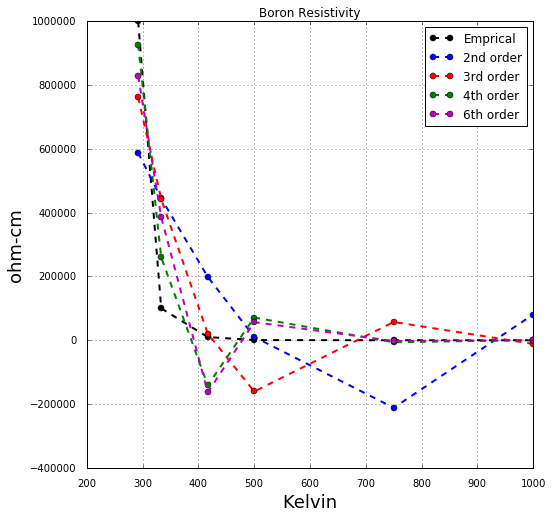

In [36]:
%matplotlib inline
#
pyplot.figure(figsize=(8,8))
pyplot.grid(True)
#
pyplot.xlabel('Kelvin', fontsize=18)
pyplot.ylabel('ohm-cm', fontsize=18)
#
pyplot.tick_params(axis='x', pad=10)
pyplot.tick_params(axis='y', pad=10)
#
#pyplot.xticks(numpy.arange(1200, 3000, 200))
#
pyplot.title('Boron Resistivity')
#
pyplot.plot(Tb,Rb,color='k', ls='--', lw=2, marker='o')
pyplot.plot(Tb,rb_fit,color='b',ls='--', lw=2, marker='o')
pyplot.plot(Tb,rb_fit2,color='r',ls='--', lw=2, marker='o')
pyplot.plot(Tb,rb_fit3,color='g',ls='--', lw=2, marker='o')
pyplot.plot(Tb,rb_fit5,color='m',ls='--', lw=2, marker='o')
pyplot.legend(['Emprical','2nd order','3rd order','4th order',\
               '6th order'], loc='upper right');

## Cobalt

In [37]:
RCo_293_text = 64.2*(1e-9)

ACo = 0.01*(1e-11)*(1e-2) #ohm-m/K^2
BCo = 1.6*(1e-11)*(1e-2) #ohm-m/K

RCo_initial = 0.
Rp = 0.

Ttest = 293.15

#this is obtained from 'Temperature dependence of the electrical resistivity of 
#pure cobalt at low temperatures, 1984 J. Phys. F: Met. Phys. 14 3007'
RCo_293 = RCo_initial + ACo*(Ttest**2) + BCo*(Ttest) + Rp

In [38]:
RCo_293/RCo_293_text 
#the formula in the paper does not match the textbook value at room temp!

0.002069173247663551

In [39]:
econd_RCo_293 = 1/RCo_293_text
econd_RCo_293 #S/m at room temp

15576323.98753894

## Nickel

In [40]:
RNi_293_text = 69.3*(1e-9)
econd_RNi_293 = 1/RNi_293_text

econd_RNi_293 #S/m at room temp

14430014.43001443

In [41]:
#note, this page has some values up to 500 K:

#https://en.wikipedia.org/wiki/Electrical_resistivities_of_the_elements_(data_page)